In [97]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

In [99]:
!wget http://www.metoffice.gov.uk/pub/data/weather/uk/climate/stationdata/oxforddata.txt

--2015-03-05 12:58:05--  http://www.metoffice.gov.uk/pub/data/weather/uk/climate/stationdata/oxforddata.txt
Resolving www.metoffice.gov.uk (www.metoffice.gov.uk)... 23.61.255.226, 23.61.255.217
Connecting to www.metoffice.gov.uk (www.metoffice.gov.uk)|23.61.255.226|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 99692 (97K) [text/plain]
Saving to: ‘oxforddata.txt’

100%[======================================>] 99,692      --.-K/s   in 0.01s   

2015-03-05 12:58:05 (7.45 MB/s) - ‘oxforddata.txt’ saved [99692/99692]



In [100]:
!head oxforddata.txt

Oxford
Location: 4509E 2072N, 63 metres amsl
Estimated data is marked with a * after the value.
Missing data (more than 2 days missing in month) is marked by  ---.
Sunshine data taken from an automatic Kipp & Zonen sensor marked with a #, otherwise sunshine data taken from a Campbell Stokes recorder.
   yyyy  mm   tmax    tmin      af    rain     sun
              degC    degC    days      mm   hours
   1853   1    8.4     2.7       4    62.8     ---
   1853   2    3.2    -1.8      19    29.3     ---
   1853   3    7.7    -0.6      20    25.9     ---


In [112]:
df = pd.read_csv("oxforddata.txt", header=5, skiprows=[6],
                 usecols=[0, 1, 5], skipinitialspace=True, 
                 comment='P', # Ignore the 'Provisional statement'
                 engine='c', dtype=None, delim_whitespace=True)

df = df.applymap(lambda x:float(str(x).rstrip('*'))) # Remove *'s

df.head()

,yyyy,mm,rain
0,1853,1,62.8
1,1853,2,29.3
2,1853,3,25.9
3,1853,4,60.1
4,1853,5,59.5


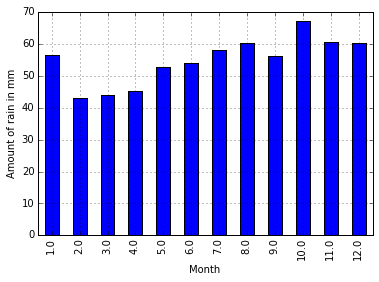

In [115]:
grouped = df.groupby('mm')['rain'].mean()
ax = grouped.plot(kind='bar', x='mm', y='rain')
ax.set_xlabel("Month")
ax.set_ylabel("Amount of rain in mm")